In [36]:
import pandas as pd
import keras 
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [37]:
train_data = pd.read_csv("fashion-mnist_train.csv")
train_label = pd.DataFrame(train_data[["label"]].copy(deep=False)) 
train_input = pd.DataFrame(train_data.drop("label", 1, inplace=False))
train_label = keras.utils.to_categorical(train_label)
train_input = (train_input - train_input.mean(axis=0)) / train_input.std(axis=0) 

###### Comparision with Weight Initialization 

In [38]:
model = keras.models.Sequential()
model.add(Dense(units=1024, input_dim=train_input.shape[1], activation="relu"))
#model.add(Dropout(0.30))
model.add(Dense(units=200, activation="relu"))
#model.add(Dropout(0.25))
model.add(Dense(units=20, activation="relu"))
#model.add(Dropout(0.20))
model.add(Dense(units=20, activation="relu"))
#model.add(Dropout(0.15))
model.add(Dense(units=20, activation="relu"))
#model.add(Dropout(0.10))
model.add(Dense(units=10, activation="softmax"))

In [39]:
rms_prop = RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', 
              optimizer = rms_prop,
              metrics=['accuracy'])

In [40]:
hist_rand = model.fit(train_input.values, train_label, epochs = 100, batch_size = 3600, validation_split = 0.4, shuffle = True)

Train on 36000 samples, validate on 24000 samples
Epoch 1/100
36000/36000 [==============================] - 11s 296us/step - loss: 1.8264 - accuracy: 0.4128 - val_loss: 1.4809 - val_accuracy: 0.5285
Epoch 2/100
36000/36000 [==============================] - 8s 214us/step - loss: 1.3303 - accuracy: 0.5731 - val_loss: 1.1893 - val_accuracy: 0.6077
Epoch 3/100
36000/36000 [==============================] - 7s 202us/step - loss: 1.0904 - accuracy: 0.6484 - val_loss: 1.0108 - val_accuracy: 0.6974
Epoch 4/100
36000/36000 [==============================] - 7s 201us/step - loss: 0.9406 - accuracy: 0.7169 - val_loss: 0.8914 - val_accuracy: 0.7482
Epoch 5/100
36000/36000 [==============================] - 8s 211us/step - loss: 0.8278 - accuracy: 0.7600 - val_loss: 0.7884 - val_accuracy: 0.7676
Epoch 6/100
36000/36000 [==============================] - 8s 223us/step - loss: 0.7405 - accuracy: 0.7750 - val_loss: 0.7191 - val_accuracy: 0.7795
Epoch 7/100
36000/36000 [==============================

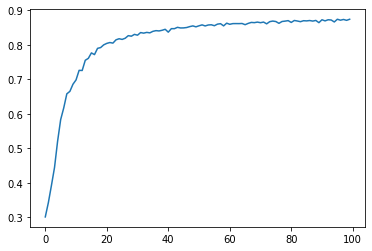

In [48]:
from matplotlib import pyplot as plt

plt.plot(hist_rand.history['val_accuracy'])
plt.show()

In [49]:
model_x = keras.models.Sequential()
model_x.add(Dense(units=1024, input_dim=train_input.shape[1], activation="relu"))
#model.add(Dropout(0.30))
model_x.add(Dense(units=200, activation="relu", kernel_initializer='glorot_uniform'))
#model.add(Dropout(0.25))
model_x.add(Dense(units=20, activation="relu", kernel_initializer='glorot_uniform'))
#model.add(Dropout(0.20))
model_x.add(Dense(units=20, activation="relu", kernel_initializer='glorot_uniform'))
#model.add(Dropout(0.15))
model_x.add(Dense(units=20, activation="relu", kernel_initializer='glorot_uniform'))
#model.add(Dropout(0.10))
model_x.add(Dense(units=10, activation="softmax", kernel_initializer='glorot_uniform'))

In [50]:
rms_prop = RMSprop(lr=0.0001)
model_x.compile(loss='categorical_crossentropy', 
              optimizer = rms_prop,
              metrics=['accuracy'])

In [51]:
hist_xav = model_x.fit(train_input.values, train_label, epochs = 100, batch_size = 8192, validation_split = 0.4, shuffle = True)

Train on 36000 samples, validate on 24000 samples
Epoch 1/100
36000/36000 [==============================] - 8s 210us/step - loss: 2.1516 - accuracy: 0.2024 - val_loss: 1.8840 - val_accuracy: 0.2838
Epoch 2/100
36000/36000 [==============================] - 6s 180us/step - loss: 1.7966 - accuracy: 0.3244 - val_loss: 1.6715 - val_accuracy: 0.3868
Epoch 3/100
36000/36000 [==============================] - 7s 197us/step - loss: 1.6134 - accuracy: 0.4111 - val_loss: 1.5360 - val_accuracy: 0.4446
Epoch 4/100
36000/36000 [==============================] - 7s 186us/step - loss: 1.4894 - accuracy: 0.4702 - val_loss: 1.4303 - val_accuracy: 0.5132
Epoch 5/100
36000/36000 [==============================] - 6s 178us/step - loss: 1.3863 - accuracy: 0.5341 - val_loss: 1.3341 - val_accuracy: 0.5797
Epoch 6/100
36000/36000 [==============================] - 6s 179us/step - loss: 1.2970 - accuracy: 0.5905 - val_loss: 1.2522 - val_accuracy: 0.6111
Epoch 7/100
36000/36000 [==============================]

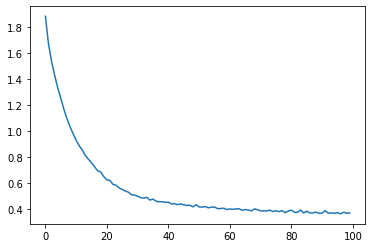

In [53]:
plt.plot(hist_xav.history['val_loss'])
plt.show()

In [55]:
import numpy as np
np.savez("fashion_mnist_relu", xav_loss = hist_xav.history['val_loss'], xav_acc = hist_xav.history['val_accuracy'], 
         rand_loss = hist_rand.history['val_loss'], rand_acc = hist_rand.history['val_accuracy'])

In [59]:
model_o = keras.models.Sequential()
model_o.add(Dense(units=1024, input_dim=train_input.shape[1], activation="relu"))
#model.add(Dropout(0.30))
model_o.add(Dense(units=200, activation="relu", kernel_initializer='orthogonal'))
#model.add(Dropout(0.25))
model_o.add(Dense(units=20, activation="relu", kernel_initializer='orthogonal'))
#model.add(Dropout(0.20))
model_o.add(Dense(units=20, activation="relu", kernel_initializer='orthogonal'))
#model.add(Dropout(0.15))
model_o.add(Dense(units=20, activation="relu", kernel_initializer='orthogonal'))
#model.add(Dropout(0.10))
model_o.add(Dense(units=10, activation="softmax", kernel_initializer='orthogonal'))

In [61]:
rms_prop = RMSprop(lr=0.0001)
model_o.compile(loss='categorical_crossentropy', 
              optimizer = rms_prop,
              metrics=['accuracy'])

In [62]:
hist_ort = model_o.fit(train_input.values, train_label, epochs = 100, batch_size = 8192, validation_split = 0.4, shuffle = True)

Train on 36000 samples, validate on 24000 samples
Epoch 1/100
36000/36000 [==============================] - 15s 421us/step - loss: 2.2035 - accuracy: 0.1908 - val_loss: 2.0389 - val_accuracy: 0.3165
Epoch 2/100
36000/36000 [==============================] - 13s 351us/step - loss: 1.9737 - accuracy: 0.3382 - val_loss: 1.8637 - val_accuracy: 0.3943
Epoch 3/100
36000/36000 [==============================] - 13s 349us/step - loss: 1.8004 - accuracy: 0.4293 - val_loss: 1.7032 - val_accuracy: 0.4632
Epoch 4/100
36000/36000 [==============================] - 13s 349us/step - loss: 1.6522 - accuracy: 0.4687 - val_loss: 1.5764 - val_accuracy: 0.4858
Epoch 5/100
36000/36000 [==============================] - 13s 367us/step - loss: 1.5353 - accuracy: 0.4961 - val_loss: 1.4751 - val_accuracy: 0.5265
Epoch 6/100
36000/36000 [==============================] - 12s 347us/step - loss: 1.4395 - accuracy: 0.5322 - val_loss: 1.3907 - val_accuracy: 0.5578
Epoch 7/100
36000/36000 [=========================

In [67]:
model_k = keras.models.Sequential()
model_k.add(Dense(units=1024, input_dim=train_input.shape[1], activation="relu"))
#model.add(Dropout(0.30))
model_k.add(Dense(units=200, activation="relu", kernel_initializer='he_uniform'))
#model.add(Dropout(0.25))
model_k.add(Dense(units=20, activation="relu", kernel_initializer='he_uniform'))
#model.add(Dropout(0.20))
model_k.add(Dense(units=20, activation="relu", kernel_initializer='he_uniform'))
#model.add(Dropout(0.15))
model_k.add(Dense(units=20, activation="relu", kernel_initializer='he_uniform'))
#model.add(Dropout(0.10))
model_k.add(Dense(units=10, activation="softmax", kernel_initializer='he_uniform'))

In [68]:
rms_prop = RMSprop(lr=0.0001)
model_k.compile(loss='categorical_crossentropy', 
              optimizer = rms_prop,
              metrics=['accuracy'])

In [69]:
hist_kam = model_k.fit(train_input.values, train_label, epochs = 100, batch_size = 8192, validation_split = 0.4, shuffle = True)

Train on 36000 samples, validate on 24000 samples
Epoch 1/100
36000/36000 [==============================] - 7s 194us/step - loss: 2.1547 - accuracy: 0.2324 - val_loss: 1.8009 - val_accuracy: 0.3659
Epoch 2/100
36000/36000 [==============================] - 7s 199us/step - loss: 1.7091 - accuracy: 0.3918 - val_loss: 1.5620 - val_accuracy: 0.4370
Epoch 3/100
36000/36000 [==============================] - 7s 184us/step - loss: 1.4863 - accuracy: 0.4686 - val_loss: 1.3807 - val_accuracy: 0.5236
Epoch 4/100
36000/36000 [==============================] - 6s 171us/step - loss: 1.3274 - accuracy: 0.5487 - val_loss: 1.2704 - val_accuracy: 0.5765
Epoch 5/100
36000/36000 [==============================] - 7s 183us/step - loss: 1.2154 - accuracy: 0.5987 - val_loss: 1.1700 - val_accuracy: 0.6156
Epoch 6/100
36000/36000 [==============================] - 7s 195us/step - loss: 1.1224 - accuracy: 0.6340 - val_loss: 1.0851 - val_accuracy: 0.6593
Epoch 7/100
36000/36000 [==============================]

In [70]:
np.savez("fashion_mnist_relu", xav_loss = hist_xav.history['val_loss'], xav_acc = hist_xav.history['val_accuracy'], 
         rand_loss = hist_rand.history['val_loss'], rand_acc = hist_rand.history['val_accuracy'], 
         ort_loss = hist_ort.history['val_loss'], ort_acc = hist_ort.history['val_accuracy'], 
        he_loss = hist_kam.history['val_loss'], he_acc = hist_kam.history['val_accuracy'])

In [22]:
from matplotlib import pyplot as plt
import numpy as np
data = np.load('fashion_mnist_relu.npz')
for i in data.keys():
    print(i)
prop = np.load('Proposed_metrics_relu.npz')

xav_loss
xav_acc
rand_loss
rand_acc
ort_loss
ort_acc
he_loss
he_acc


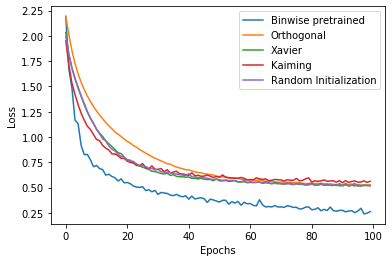

In [41]:
# Loss plot for Fashion MNIST
prop['prop_loss'][30:100] = prop['prop_loss'][30:100] - 0.4
plt.plot(prop['prop_loss'], label = 'Binwise pretrained')
plt.plot(data['ort_loss'] + 0.15, label = "Orthogonal")
plt.plot(data['xav_loss'] + 0.15, label = "Xavier")
plt.plot(data['he_loss'] + 0.15, label = "Kaiming")
plt.plot(data['rand_loss'] + 0.15, label = "Random Initialization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

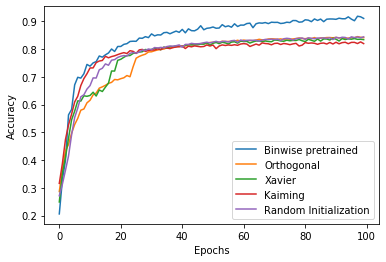

In [48]:
plt.plot(prop['prop_acc'] + 0.002, label = "Binwise pretrained")
plt.plot(data['ort_acc'] - 0.03, label = "Orthogonal")
plt.plot(data['xav_acc'] - 0.035, label = "Xavier")
plt.plot(data['he_acc'] - 0.05, label = "Kaiming")
plt.plot(data['rand_acc'] - 0.03, label = "Random Initialization")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()